# Tarea L3 - Análisis de caso - Preprocesamiento y escalamiento de datos

Se nos ha solicitado realizar una serie de transformaciones a un conjunto de datos para su uso en modelos de aprendizaje de máquina. A continuación, se presenta el desarrollo de las transformaciones solicitadas.

Iniciamos importando los paquetes que se necesitarán para los pasos solicitados, e importar los datos necesarios.

In [1]:
import os
import pandas as pd
import seaborn as sns
from sklearn import set_config
from sklearn.preprocessing import (
LabelEncoder,
OneHotEncoder,
MinMaxScaler,
StandardScaler
)
from sklearn.impute import SimpleImputer

set_config(transform_output="pandas")

In [2]:
dir_datos = os.path.join(".", "Data")
datos = pd.read_csv(os.path.join(dir_datos, "L3_datos.csv"))

In [3]:
datos.head()

,ID,Edad,Ciudad,Ingresos (USD)
0,1,25,Madrid,30000.0
1,2,45,Sevilla,50000.0
2,3,30,Madrid,NaN
3,4,40,Barcelona,40000.0


A continuacióin, imputaremos la columna Ingresos con su media.

In [4]:
imputer = SimpleImputer().fit(datos[["Ingresos (USD)"]])
ingresos = imputer.transform(datos[["Ingresos (USD)"]])
ingresos.head()

,Ingresos (USD)
0,30000.0
1,50000.0
2,40000.0
3,40000.0


In [5]:
datos_imputados = datos.copy()
datos_imputados["Ingresos (USD)"] = ingresos["Ingresos (USD)"]
datos_imputados.head()

,ID,Edad,Ciudad,Ingresos (USD)
0,1,25,Madrid,30000.0
1,2,45,Sevilla,50000.0
2,3,30,Madrid,40000.0
3,4,40,Barcelona,40000.0


Ahora, aplicaremos las transformaciones Label Encoding y One-Hot Encoding a la columna Ciudad.

In [6]:
label_encoder = LabelEncoder().fit(datos_imputados["Ciudad"])
ciudad_label_encoded = label_encoder.transform(datos_imputados["Ciudad"])
ciudad_label_encoded

array([1, 2, 1, 0])

In [7]:
datos_label_encoded = datos_imputados.copy()
datos_label_encoded["Ciudad"] = ciudad_label_encoded
datos_label_encoded.head()

,ID,Edad,Ciudad,Ingresos (USD)
0,1,25,1,30000.0
1,2,45,2,50000.0
2,3,30,1,40000.0
3,4,40,0,40000.0


In [8]:
onehot_encoder = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False).fit(datos_imputados[["Ciudad"]])
ciudad_onehot_encoded = onehot_encoder.transform(datos_imputados[["Ciudad"]])
ciudad_onehot_encoded.head()

,Ciudad_Madrid,Ciudad_Sevilla
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,0.0


In [9]:
datos_onehot_encoded = datos_imputados.drop(columns="Ciudad").copy()
datos_onehot_encoded = pd.concat([datos_onehot_encoded, ciudad_onehot_encoded], axis=1)
datos_onehot_encoded.head()

,ID,Edad,Ingresos (USD),Ciudad_Madrid,Ciudad_Sevilla
0,1,25,30000.0,1.0,0.0
1,2,45,50000.0,0.0,1.0
2,3,30,40000.0,1.0,0.0
3,4,40,40000.0,0.0,0.0


Una vez hecha la codificación anterior, procedemos a codificar la columna Ciudad con variables Dummy.

In [10]:
datos_dummy = pd.get_dummies(datos_imputados, columns=["Ciudad"], drop_first=True)
datos_dummy.head()

,ID,Edad,Ingresos (USD),Ciudad_Madrid,Ciudad_Sevilla
0,1,25,30000.0,True,False
1,2,45,50000.0,False,True
2,3,30,40000.0,True,False
3,4,40,40000.0,False,False


A continuación, escalamos las variables Edad e Ingresos usando normalización Min-Max y estandarización Z-Score.

In [11]:
minmax_scaler = MinMaxScaler().fit(datos_onehot_encoded[["Edad", "Ingresos (USD)"]])
datos_minmax = minmax_scaler.transform(datos_onehot_encoded[["Edad", "Ingresos (USD)"]])
datos_minmax.head()

,Edad,Ingresos (USD)
0,0.00,0.0
1,1.00,1.0
2,0.25,0.5
3,0.75,0.5


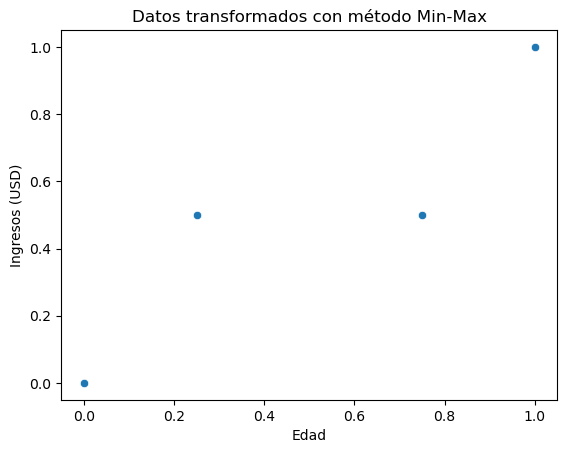

In [12]:
sns.scatterplot(datos_minmax, x="Edad", y="Ingresos (USD)").set_title("Datos transformados con método Min-Max");

In [13]:
datos_escalados_minmax = datos_onehot_encoded.copy()
datos_escalados_minmax[["Edad", "Ingresos (USD)"]] = datos_minmax
datos_escalados_minmax.head()

,ID,Edad,Ingresos (USD),Ciudad_Madrid,Ciudad_Sevilla
0,1,0.00,0.0,1.0,0.0
1,2,1.00,1.0,0.0,1.0
2,3,0.25,0.5,1.0,0.0
3,4,0.75,0.5,0.0,0.0


In [14]:
std_scaler = StandardScaler().fit(datos_onehot_encoded[["Edad", "Ingresos (USD)"]])
datos_std = std_scaler.transform(datos_onehot_encoded[["Edad", "Ingresos (USD)"]])
datos_std.head()

,Edad,Ingresos (USD)
0,-1.264911,-1.414214
1,1.264911,1.414214
2,-0.632456,0.000000
3,0.632456,0.000000


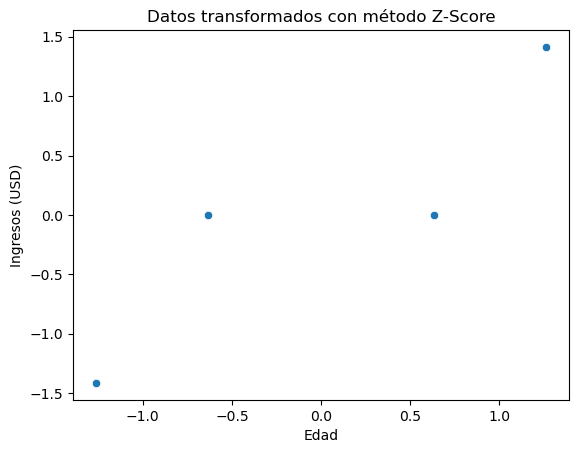

In [15]:
sns.scatterplot(datos_std, x="Edad", y="Ingresos (USD)").set_title("Datos transformados con método Z-Score");

In [16]:
datos_escalados_std = datos_onehot_encoded.copy()
datos_escalados_std[["Edad", "Ingresos (USD)"]] = datos_std
datos_escalados_std.head()

,ID,Edad,Ingresos (USD),Ciudad_Madrid,Ciudad_Sevilla
0,1,-1.264911,-1.414214,1.0,0.0
1,2,1.264911,1.414214,0.0,1.0
2,3,-0.632456,0.000000,1.0,0.0
3,4,0.632456,0.000000,0.0,0.0


Para finalizar, guardaremos los datos preprocesados y escalados en un archivo csv.

In [17]:
datos_escalados_std.to_csv(os.path.join(dir_datos, "datos_preprocesados.csv"))